<h1 align="center"><font size="5">Predicting Severity of Collisions in Seattle</font></h1>
<h6 align="center"><font size="2">Author: Saurabh Patel</font></h6>

Traffic collisions continue to be a serious problem. Roads safety is pressing concern for many countries, where road crash fatalities and disabilities is gradually being recognized as a major public health concern. According to World Health Organization (WHO); nearly 1.25 million people die in road crashes each year, on average 3,287 deaths a day. In addition, road traffic crashes rank as the 9th leading cause of death and account for 2.2% of all deaths globally.
Collisions are financial burden on government and society. Prediction of severity of collision helps local transport authority and emergency responders to manage traffic and avoid loss of life and property.
This project uses collision data of Seattle, WA. The aim of this project is to use data science methodology and machine learning to gain an understanding of the problem and predict the severity of collision and develop prevention mechanisms the same.

In [1]:
#import required libraries for data cleansing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import folium
%matplotlib inline



In [2]:
#functions used later in the code
def plotbyInt_values(df):
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphPerRow=3
    nGraphRow = round(nCol / nGraphPerRow)
    fig, ax = plt.subplots(nGraphRow, nGraphPerRow,figsize=(24,24))
    for variable, subplot in zip(columnNames, ax.flatten()):
        #print(df[variable])
        if (variable!=''):
            _= df.pivot_table(index=variable,columns=columnNames[0], aggfunc='size').plot.bar(stacked=True, ax=subplot)
            for label in subplot.get_xticklabels():
                label.set_rotation(90)
                
def plotbycharvalues(colname):
    for i in range (0,len(colname)):
        bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 7)
        g = sns.FacetGrid(df, col=colname[i], hue="SEVERITYCODE", palette="Set1", col_wrap=4)
        g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
        g.axes[-1].legend()
        plt.show()

def ShowSummary(df):

    col_name = round(100*(df.isna().sum()/len(df)), 2)
    col_nuniq = df.nunique()    
    df_smry = pd.DataFrame({"data_type": df.dtypes,
                           "percent_missing_values": col_name,
                           "total_unique_values": col_nuniq}).sort_values(by=["percent_missing_values"],
                                                                            ascending=False)
    return df_smry

In [3]:
#Data import in dataframe

datafile="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(datafile)
#convert dates to proper format
df["INCDATE"] = pd.to_datetime(pd.DatetimeIndex(df['INCDATE']).date)
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df.replace("?", np.nan, inplace = True)
df.head(1)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE           X         Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.70314         1    1307       1307  3502005   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND LIGHTCOND PEDROWNOTGRNT  \
0  Matched  Intersection  37475.0  ...      Wet  Daylight           NaN   

   SDOTCOLNUM SPEEDING ST_COLCODE         ST_COLDESC  SEGLANEKEY  \
0         NaN      NaN         10  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  

[1 rows x 38 columns]

<h3> Lets Look at metadata

<

| Attribute       	| Data type, length 	| Description                                                 	|
|-----------------	|-------------------	|-------------------------------------------------------------	|
| OBJECTID        	| ObjectID          	| ESRI unique identifier                                      	|
| SHAPE           	| Geometry          	| ESRI geometry field                                         	|
| INCKEY          	| Long              	| A unique key for the incident                               	|
| COLDETKEY       	| Long              	| Secondary key for the incident                              	|
| ADDRTYPE        	| Text, 12          	| Collision address type:                                     	|
|                 	|                   	| ·           Alley                                           	|
|                 	|                   	| ·           Block                                           	|
|                 	|                   	| ·           Intersection                                    	|
| INTKEY          	| Double            	| Key that corresponds to the intersection                    	|
|                 	|                   	| associated with a collision                                 	|
| LOCATION        	| Text, 255         	| Description of the general location of the                  	|
|                 	|                   	| collision                                                   	|
| EXCEPTRSNCODE   	| Text,   10        	|                                                             	|
| EXCEPTRSNDESC   	| Text,   300       	|                                                             	|
| SEVERITYCODE    	| Text, 100         	| A code that corresponds to the severity of the collision:   	|
|                 	|                   	| ·           3—fatality                                      	|
|                 	|                   	| ·           2b—serious injury                               	|
|                 	|                   	| ·           2—injury                                        	|
|                 	|                   	| ·           1—prop damage                                   	|
|                 	|                   	| ·           0—unknown                                       	|
| SEVERITYDESC    	| Text              	| A detailed description of the severity of the               	|
|                 	|                   	| collision                                                   	|
| COLLISIONTYPE   	| Text,   300       	| Collision type                                              	|
| PERSONCOUNT     	| Double            	| The total number of people involved in the                  	|
|                 	|                   	| collision                                                   	|
| PEDCOUNT        	| Double            	| The number of pedestrians involved in the                   	|
|                 	|                   	| collision. This is entered by   the state.                  	|
| PEDCYLCOUNT     	| Double            	| The number of bicycles involved in the collision.           	|
|                 	|                   	| This is entered by the state.                               	|
| VEHCOUNT        	| Double            	| The number of vehicles involved in the collision.           	|
|                 	|                   	| This is entered by the state.                               	|
| INJURIES        	| Double            	| The number of total injuries in the collision. This         	|
|                 	|                   	| is entered by the state.                                    	|
| SERIOUSINJURIES 	| Double            	| The number of serious injuries in the collision.            	|
|                 	|                   	| This is entered by the state.                               	|
| FATALITIES      	| Double            	| The number of fatalities in the collision. This is          	|
|                 	|                   	| entered by the state.                                       	|
| INCDATE         	| Date              	| The date of the incident.                                   	|
| INCDTTM         	| Text,   30        	| The date and time of the incident.                          	|
|                 	|                   	| Category of junction at which collision took                	|
| JUNCTIONTYPE    	| Text,   300       	| place                                                       	|
| SDOT_COLCODE    	| Text,   10        	| A code given to the collision by SDOT.                      	|
| SDOT_COLDESC    	| Text, 300         	| A description of the collision corresponding to             	|
|                 	|                   	| the collision code.                                         	|
|                 	|                   	| Whether or not collision was due to inattention.            	|
| INATTENTIONIND  	| Text,   1         	| (Y/N)                                                       	|
| UNDERINFL       	| Text, 10          	| Whether or not a driver involved was under the              	|
|                 	|                   	| influence of drugs or alcohol.                              	|
| WEATHER         	| Text, 300         	| A description of the weather conditions during              	|
|                 	|                   	| the time of the collision.                                  	|
| ROADCOND        	| Text,   300       	| The condition of the road during the collision.             	|
| LIGHTCOND       	| Text,   300       	| The light conditions during the collision.                  	|
| PEDROWNOTGRNT   	| Text, 1           	| Whether or not the pedestrian right of way was              	|
|                 	|                   	| not granted. (Y/N)                                          	|
| SDOTCOLNUM      	| Text,   10        	| A number given to the collision by SDOT.                    	|
| SPEEDING        	| Text, 1           	| Whether or not speeding was a factor in the                 	|
|                 	|                   	| collision. (Y/N)                                            	|
| ST_COLCODE      	| Text, 10          	| A code provided by the state that describes the collision.  	|
|                 	|                   	| Dictionary.                                                 	|
| ST_COLDESC      	| Text, 300         	| A description that corresponds to the state’s               	|
|                 	|                   	| coding designation.                                         	|
| SEGLANEKEY      	| Long              	| A key for the lane segment in which the collision           	|
|                 	|                   	| occurred.                                                   	|
| CROSSWALKKEY    	| Long              	| A key for the crosswalk at which the collision              	|
|                 	|                   	| occurred.                                                   	|
| HITPARKEDCAR    	| Text, 1           	| Whether or not the collision involved hitting a             	|
|                 	|                   	| parked car. (Y/N)                                           	|

In [4]:
print(df.columns)
print(df.shape)

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')
(194673, 38)


Many of the columns either hold a key or code, these colummns can be removed from the dataframe. For columns which are not defined in metadata will also be dropped. STATUS and SEVERITYCODE.1 are not present in metadata. I am not deleting OBJECTID as it is a unique key and can be helpful in plotting.
'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1','SEVERITYDESC','SDOT_COLCODE', 'SDOT_COLDESC',, 'SDOTCOLNUM','ST_COLCODE', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY'

In [5]:
df.drop(['INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1','SEVERITYDESC'
,'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY'],axis=1,inplace=True)

In [6]:
ShowSummary(df)

data_type  percent_missing_values  total_unique_values
PEDROWNOTGRNT           object                   97.60                    1
SPEEDING                object                   95.21                    1
INATTENTIONIND          object                   84.69                    1
JUNCTIONTYPE            object                    3.25                    7
Y                      float64                    2.74                23839
X                      float64                    2.74                23563
LIGHTCOND               object                    2.66                    9
WEATHER                 object                    2.61                   11
ROADCOND                object                    2.57                    9
COLLISIONTYPE           object                    2.52                   10
UNDERINFL               object                    2.51                    4
LOCATION                object                    1.38                24102
ADDRTYPE                object                    0.99                    3
ST_COLCODE              object                    0.01                  115
SEVERITYCODE             int64                    0.00                    2
INCDATE         datetime64[ns]                    0.00                 5985
INCDTTM         datetime64[ns]                    0.00               162058
VEHCOUNT                 int64                    0.00                   13
PEDCYLCOUNT              int64                    0.00                    3
PEDCOUNT                 int64                    0.00                    7
PERSONCOUNT              int64                    0.00                   47
OBJECTID                 int64                    0.00               194673
HITPARKEDCAR            object                    0.00                    2

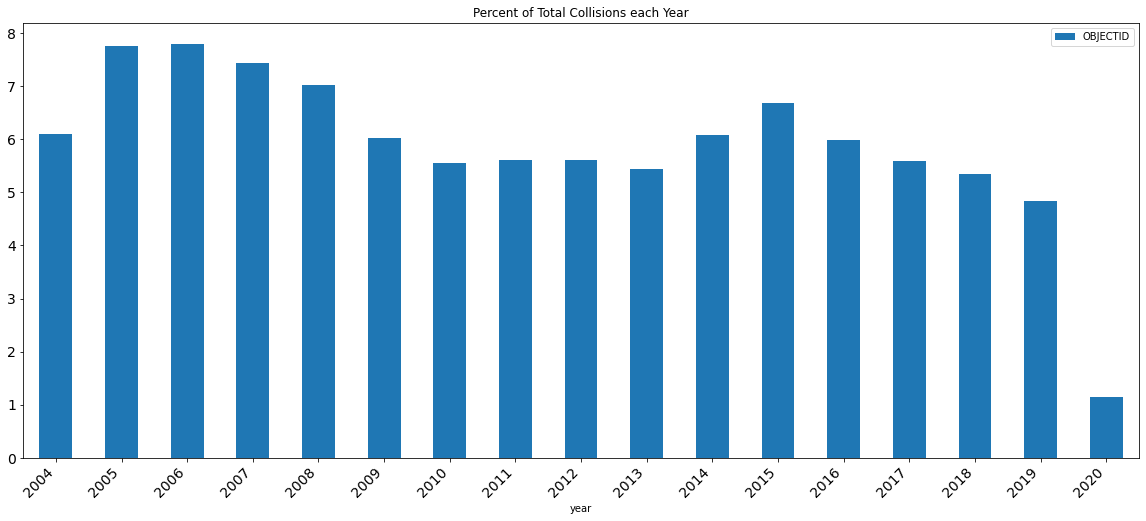

In [7]:
#we have very intresting attribute, date. lets see how our data is spanned across years. 
df["year"] = pd.DatetimeIndex(df.INCDATE).year 
df["month"] = pd.DatetimeIndex(df.INCDATE).month  
df["day"] = pd.DatetimeIndex(df.INCDATE).day  
df['dayofweek']= pd.DatetimeIndex(df.INCDATE).dayofweek
df['Hour'] = pd.DatetimeIndex(df.INCDTTM).hour.astype(int)
df_yr = round(100*(df[["year","OBJECTID"]].groupby(by=["year"]).count()/len(df)), 2)
# create a bar chart for visualization 
df_yr.plot(kind='bar', figsize=(20, 8));
plt.title("Percent of Total Collisions each Year");
plt.xticks(rotation=45, ha='right', size=14);
plt.yticks(size=14);
plt.show();

In [8]:
#It is quite evident that 2020 has very less data compared to other years. this will cause unnecessary noise in prediction.
#let's remove reccords from 2020
df = df[df["year"] != 2020]
print(df.shape)

(192428, 28)


In [9]:
#As per meta data  INATTENTIONIND, UNDERINFL,PEDROWNOTGRNT, SPEEDING, HITPARKEDCAR are indicators, let's see what values they have
print("INATTENTIONIND",df['INATTENTIONIND'].value_counts().to_frame('count'))
print("UNDERINFL",df['UNDERINFL'].value_counts().to_frame('count'))
print("PEDROWNOTGRNT",df['PEDROWNOTGRNT'].value_counts().to_frame('count'))
print("SPEEDING",df['SPEEDING'].value_counts().to_frame('count'))
print("HITPARKEDCAR",df['HITPARKEDCAR'].value_counts().to_frame('count'))

INATTENTIONIND    count
Y  29805
UNDERINFL    count
N  99013
0  80394
Y   5126
1   3995
PEDROWNOTGRNT    count
Y   4631
SPEEDING    count
Y   9261
HITPARKEDCAR     count
N  185524
Y    6904


In [10]:
# let's clean the identifiers based on the uniques values in it
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
df["INATTENTIONIND"].replace('Y',1, inplace=True)
df[["INATTENTIONIND"]] = df[["INATTENTIONIND"]].astype("int")

df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N',0, inplace=True)
df["UNDERINFL"].replace('Y',1, inplace=True)
df[["UNDERINFL"]] = df[["UNDERINFL"]].astype("int")

df["PEDROWNOTGRNT"].replace(np.nan, 0, inplace=True)
df["PEDROWNOTGRNT"].replace('Y',1, inplace=True)
df[["PEDROWNOTGRNT"]] = df[["PEDROWNOTGRNT"]].astype("int")

df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace('Y',1, inplace=True)
df[["SPEEDING"]] = df[["SPEEDING"]].astype("int")

df["HITPARKEDCAR"].replace('N',0, inplace=True)
df["HITPARKEDCAR"].replace('Y',1, inplace=True)
df[["HITPARKEDCAR"]] = df[["HITPARKEDCAR"]].astype("int")

<h4> let's look at catgorical data

LIGHTCOND                            count
Daylight                  115407
Dark - Street Lights On    48104
Unknown                    17860
Dusk                        5862
Dawn                        2480
Dark - No Street Lights     1522
Dark - Street Lights Off    1193


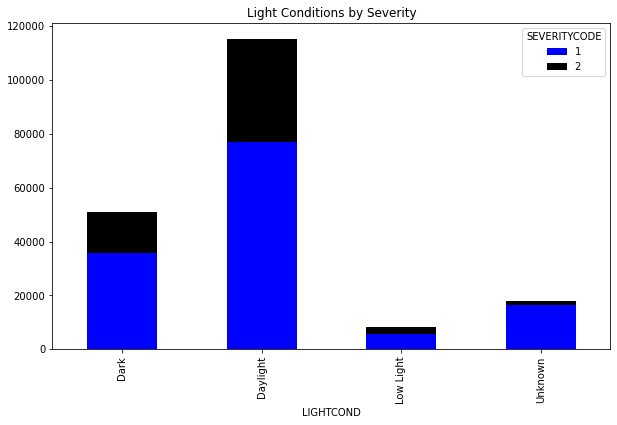

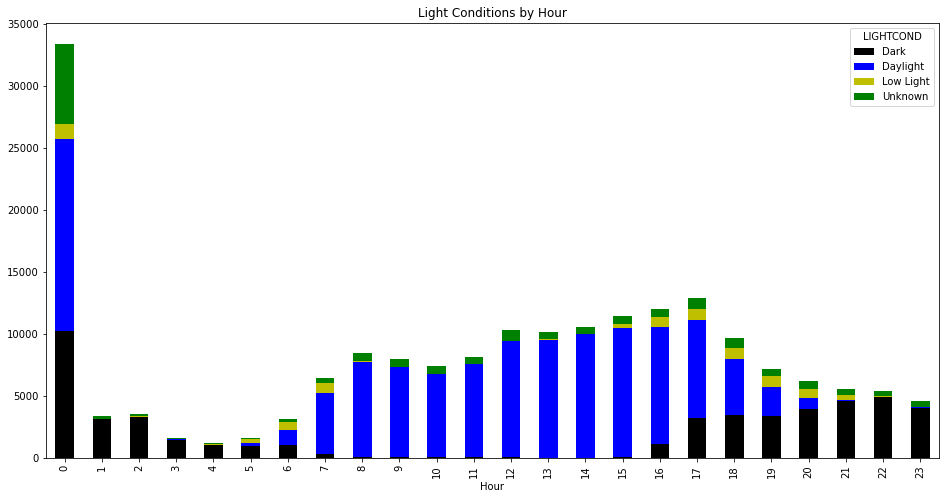

In [11]:
#light conditions.let's repalce other and null as Unknown
df["LIGHTCOND"].replace('Other','Unknown', inplace=True)
df["LIGHTCOND"].replace(np.nan, 'Unknown', inplace=True)
print("LIGHTCOND",df['LIGHTCOND'].value_counts().to_frame('count'))
df['LIGHTCOND'].isna().sum()
# let's classify the data
df["LIGHTCOND"].replace('Dusk','Low Light', inplace=True)
df["LIGHTCOND"].replace('Dawn','Low Light', inplace=True)
df["LIGHTCOND"].replace('Dark - No Street Lights','Dark', inplace=True)
df["LIGHTCOND"].replace('Dark - Street Lights On', 'Dark', inplace=True)
df["LIGHTCOND"].replace('Dark - Street Lights Off','Dark', inplace=True)
#plot  light condition by severity and hours in the day
df.pivot_table(index='LIGHTCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('b','#000000'),figsize=(10, 6)   )
plt.title("Light Conditions by Severity");
df.pivot_table(index= ('Hour'),columns='LIGHTCOND', aggfunc='size').plot.bar(stacked=True , color = ('#000000','b','y','g'),figsize=(16, 8)   )
plt.title("Light Conditions by Hour");


<h6> from the chart it is evident that, INTDDTM is not correct, we will remove data with hour as 0. and light condition not as dark. for other unknown values it is visible from graph that mostly it is daylight in seatlle from 6 am to 6 pm

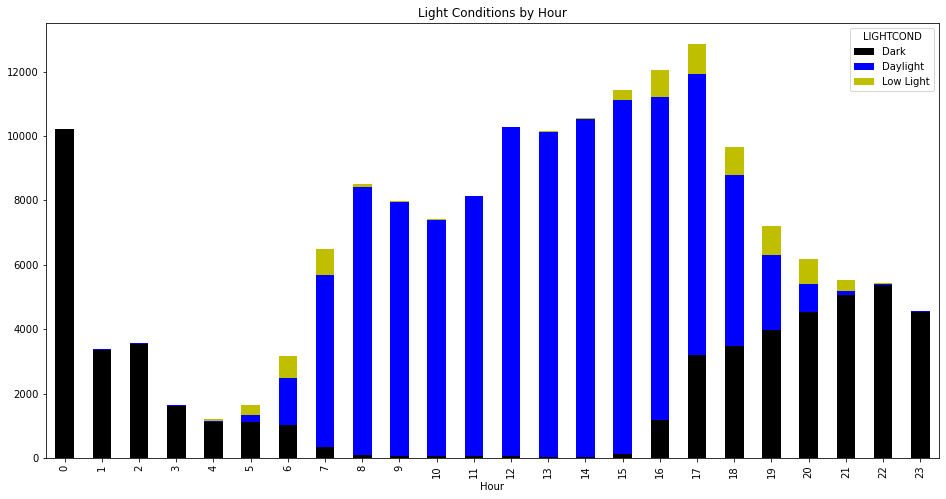

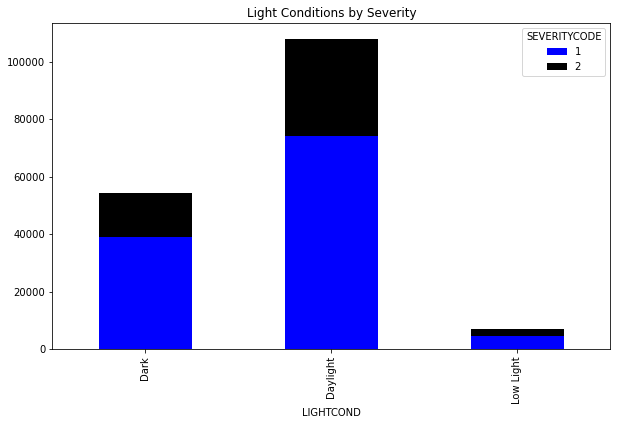

In [12]:
# fill the missing values
df = df[((df["Hour"] == 0 )& (df["LIGHTCOND"]=='Dark')) | (df["Hour"] != 0)]
df.loc[df['Hour'].isin([0,1,2,3,4,5,19,20,21,22,23])&(df["LIGHTCOND"]=='Unknown'), 'LIGHTCOND'] = 'Dark'
df.loc[(df['Hour'] >= 6)&(df['Hour'] <= 18)&(df["LIGHTCOND"]=='Unknown') ,'LIGHTCOND'] = 'Daylight'
df.pivot_table(index= ('Hour'),columns='LIGHTCOND', aggfunc='size').plot.bar(stacked=True , color = ('#000000','b','y','g') ,figsize=(16, 8)   )
plt.title("Light Conditions by Hour");
df.pivot_table(index='LIGHTCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('b','#000000')  ,figsize=(10, 6)   )
plt.title("Light Conditions by Severity");

<h6> let's take a look at weather

WEATHER                           count
Clear                     99299
Raining                   30161
Overcast                  24651
Unknown                   13649
Snowing                     806
Fog/Smog/Smoke              547
Sleet/Hail/Freezing Rain     99
Blowing Sand/Dirt            51
Severe Crosswind             25
Unknown 0


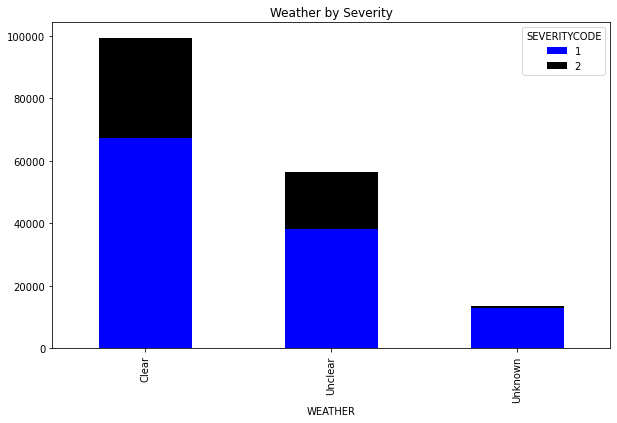

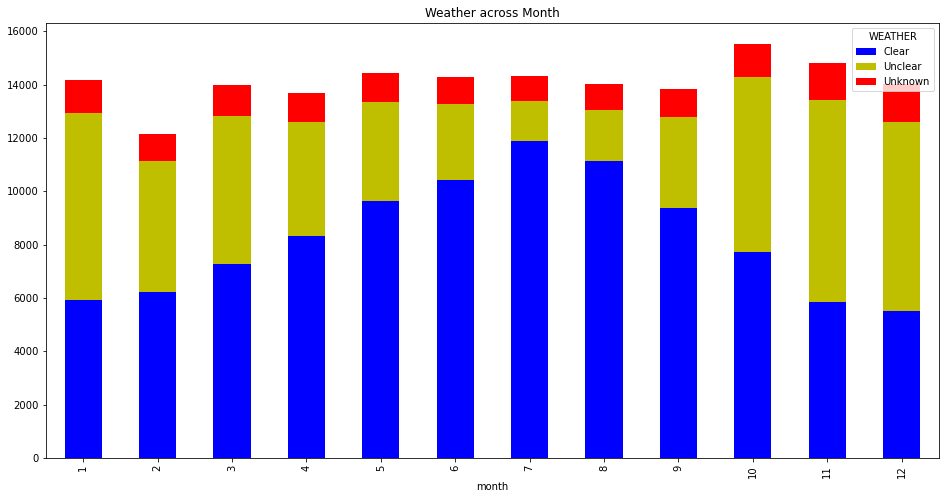

In [13]:
#replace other and nulls with unknown
df["WEATHER"].replace(np.nan,'Unknown', inplace=True)
df["WEATHER"].replace('Other','Unknown', inplace=True)
print("WEATHER",df['WEATHER'].value_counts().to_frame('count'))
print("Unknown",df['WEATHER'].isna().sum())
#let's classify weather in clear and not clear
df.loc[(df['WEATHER'] != 'Clear') & (df['WEATHER'] != 'Unknown'),'WEATHER'] = 'Unclear'
df.pivot_table(index='WEATHER',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','#000000')    ,figsize=(10, 6)   )
plt.title("Weather by Severity");
#how is waether in seatlle across the year
df.pivot_table(index= ('month'),columns='WEATHER', aggfunc='size').plot.bar(stacked=True , color = ('b','y','r')    ,figsize=(16, 8)   )
plt.title("Weather across Month");

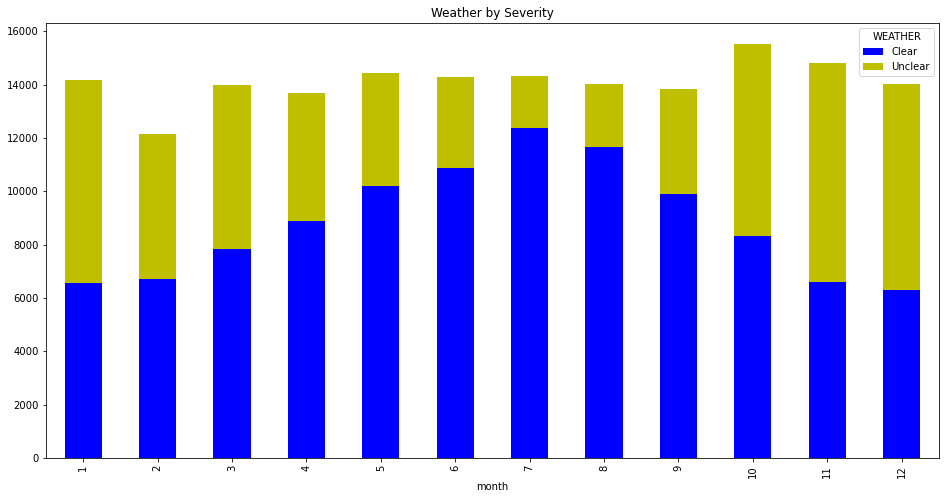

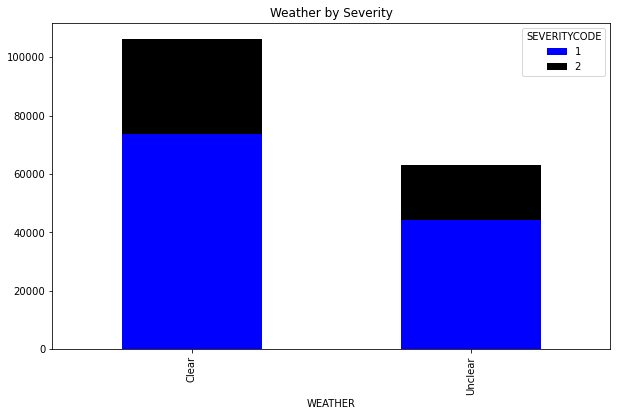

In [14]:
#assuming that weather will be same on day across seattle. so replace the data where weather is unknown with the datadata where weather is not unknown and dates are matching 
df_notnull=df.loc[df['WEATHER']!='Unknown']
df_notnull = df_notnull[['INCDATE','WEATHER']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('INCDATE',inplace=True) 
s=df_notnull.to_dict()['WEATHER']
df.loc[df['WEATHER']=='Unknown','WEATHER']=df[('INCDATE')].map(s)
df = df[df["WEATHER"].notna()]
df.pivot_table(index= ('month'),columns='WEATHER', aggfunc='size').plot.bar(stacked=True , color = ('b','y','r')    ,figsize=(16, 8)   )
plt.title("Weather by Severity");
df.pivot_table(index='WEATHER',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','#000000')    ,figsize=(10, 6)   )
plt.title("Weather by Severity");

ROADCOND                  count
Dry             110988
Wet              43042
Unknown          13020
Ice               1112
Snow/Slush         899
Standing Water     103
Sand/Mud/Dirt       64
Oil                 57
Unknown 0


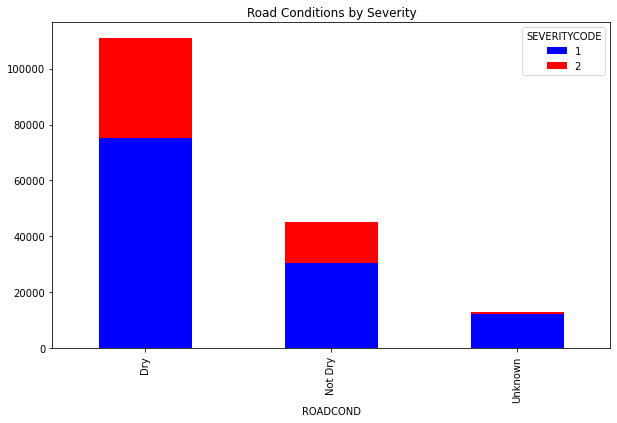

In [15]:
#let's take a look at road conditions 
df["ROADCOND"].replace(np.nan,'Unknown', inplace=True)
df["ROADCOND"].replace('Other','Unknown', inplace=True)
print("ROADCOND",df['ROADCOND'].value_counts().to_frame('count'))
print("Unknown",df['ROADCOND'].isna().sum())
#classify watroad condition her as dry and not dry, there are lot of unknonws huh
df.loc[(df['ROADCOND'] != 'Dry') & (df['ROADCOND'] != 'Unknown'),'ROADCOND'] = 'Not Dry'
df.pivot_table(index='ROADCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','r')    ,figsize=(10, 6)   )
plt.title("Road Conditions by Severity");

on a particular day at a particular location road condition will be same. with this logic let's fill unknowons

In [16]:
#creating a key with date and location
df["Key1"]=df['INCDATE'].astype(str)+df['LOCATION']

ROADCOND           count
Dry      111033
Not Dry   46307
Unknown   11945
Unknown 0


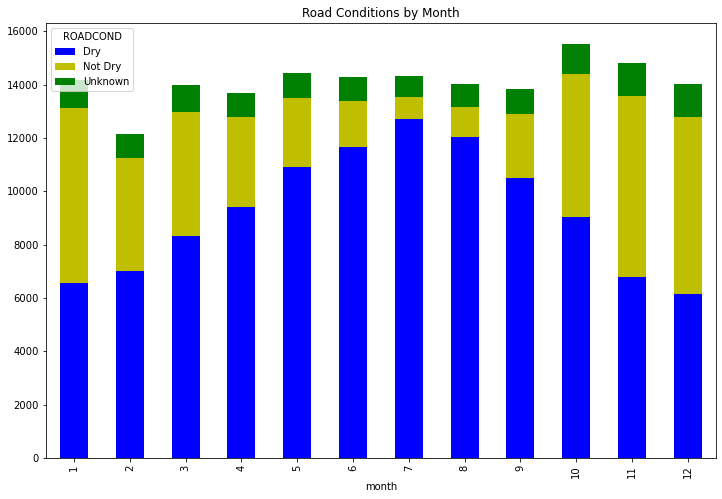

In [17]:
#using the key's let's repalce unknown
df_notnull=df.loc[df['ROADCOND']!='Unknown']
df_notnull = df_notnull[['Key1','ROADCOND']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('Key1',inplace=True) 
s=df_notnull.to_dict()['ROADCOND']
df.loc[df['ROADCOND']=='Unknown','ROADCOND']=df[('Key1')].map(s)
df["ROADCOND"].replace(np.nan,'Unknown', inplace=True)
print("ROADCOND",df['ROADCOND'].value_counts().to_frame('count'))
print("Unknown",df['ROADCOND'].isna().sum())
#stil unknowns huh
df.pivot_table(index= ('month'),columns='ROADCOND', aggfunc='size').plot.bar(stacked=True , color = ('b','y','g') ,figsize=(12, 8)  )
plt.title("Road Conditions by Month");

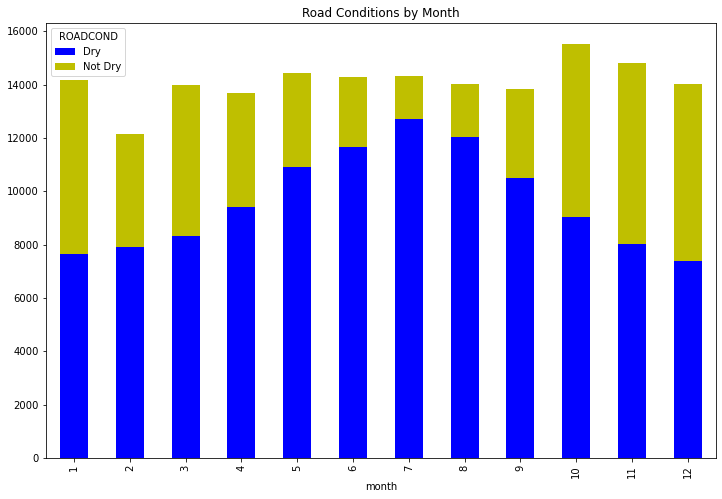

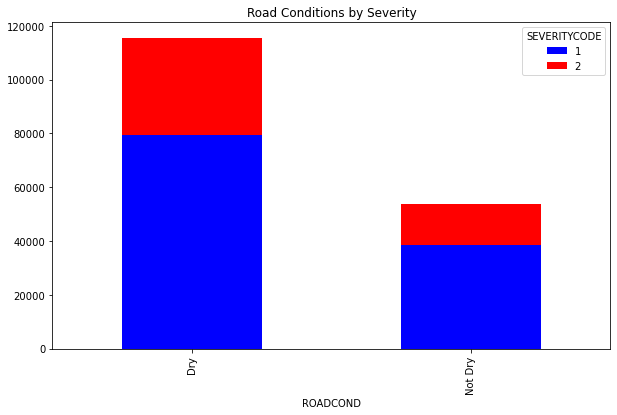

In [18]:
#as road conditions are dry and not dry, we can say that road in seatlle are mostly dry during match to oct. with this assumption let's remove the nulls/unknows
df.loc[df['month'].isin([1,2,11,12])&(df["ROADCOND"]=='Unknown'), 'ROADCOND'] = 'Dry'
df.loc[(df['month'] >= 3)&(df['month'] <= 10)&(df["ROADCOND"]=='Unknown') ,'ROADCOND'] = 'Not Dry'
df.pivot_table(index= ('month'),columns='ROADCOND', aggfunc='size').plot.bar(stacked=True , color = ('b','y','g') ,figsize=(12, 8)  )
plt.title("Road Conditions by Month");
df.pivot_table(index='ROADCOND',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','r')    ,figsize=(10, 6)   )
plt.title("Road Conditions by Severity");


COLLISIONTYPE             count
Parked Car  42335
Angles      31100
Rear Ended  30277
Other       21085
Sideswipe   16637
Left Turn   12351
Pedestrian   6068
Cycles       4937
Right Turn   2626
Head On      1848
Unknown 21
[23 22 51 50 21 52 66 40 57 56 41 17 67 49 31 65 42 48 64 53 54 60 43 87
 85 88 18]


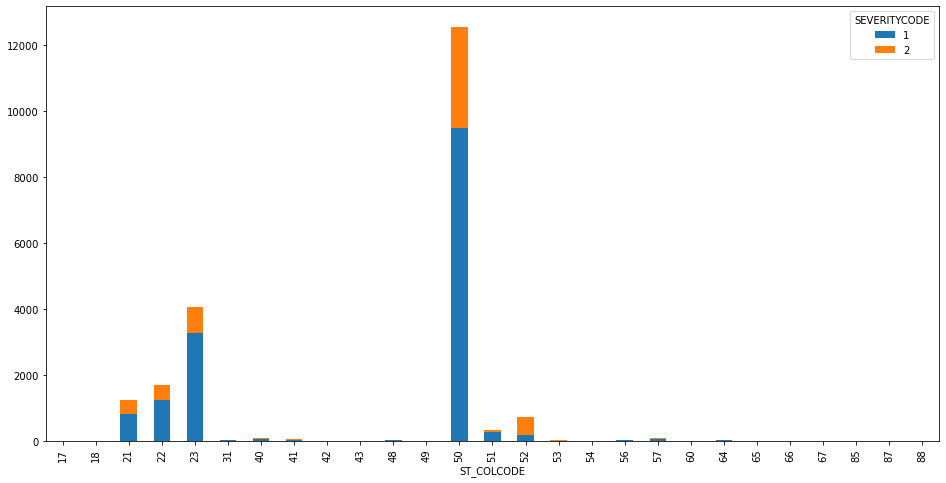

In [19]:
#there are lots of other data in collsion type, only 21 unknows let's get rid of it
print("COLLISIONTYPE",df['COLLISIONTYPE'].value_counts().to_frame('count'))
print("Unknown",df['COLLISIONTYPE'].isna().sum())
df = df[df["COLLISIONTYPE"].notna()]
#let's use ST_COLCODE to fill other value, first let's map the ercords where colllsion type as other with ST_COLCODE 
dfcollision = df[(df["COLLISIONTYPE"]=='Other')]
dfcollision=dfcollision[["ST_COLCODE","COLLISIONTYPE","SEVERITYCODE"]]
dfcollision.reset_index(inplace=True,drop = True)
dfcollision = dfcollision[dfcollision["ST_COLCODE"].notna()]
dfcollision = dfcollision[dfcollision["ST_COLCODE"] !=' ']
#dfcollision.drop_duplicates(inplace=True)
dfcollision[["ST_COLCODE"]] = dfcollision[['ST_COLCODE']].astype("int")
dfcollision.pivot_table(index= ('ST_COLCODE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True ,figsize=(16, 8)   )
print(dfcollision["ST_COLCODE"].unique())

#df.pivot_table(index='COLLISIONTYPE',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','r') ,figsize=(10,6)  )


<h7> there are few colcodes which we can use, based on metadata we will now replace collsion type with correct values

(169264, 29)
(168788, 28)


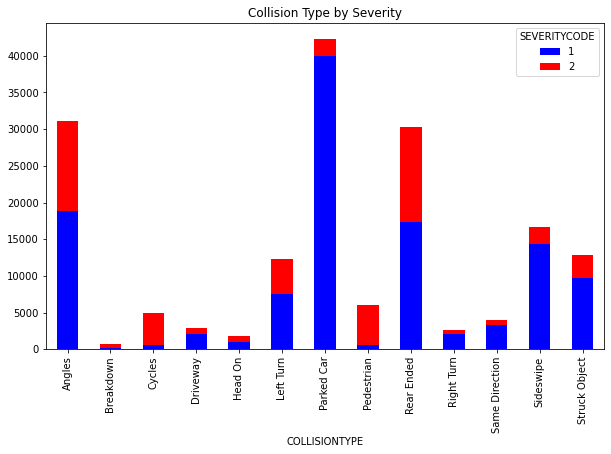

In [20]:
print(df.shape)
df = df[df["ST_COLCODE"].notna()]
df = df[df["ST_COLCODE"] !=' ']
df[["ST_COLCODE"]] = df[['ST_COLCODE']].astype("int")
#dropping thise which are not in metadata or very less values
df = df[~df["ST_COLCODE"].isin([17,18,31,40,41,42,43,48,49,53,54,56,57,60,64,65,66,67,85,87,88])]
#based in metadata  let's repalce collsion type
df.loc[df['ST_COLCODE'].isin([51,50]), 'COLLISIONTYPE'] = 'Struck Object'
df.loc[df['ST_COLCODE'].isin([21,22]), 'COLLISIONTYPE'] = 'Driveway'
df.loc[df['ST_COLCODE'].isin([52]), 'COLLISIONTYPE'] = 'Breakdown'
df.loc[df['ST_COLCODE'].isin([23]), 'COLLISIONTYPE'] = 'Same Direction'
df.drop(columns=[ 'ST_COLCODE'],axis=1,inplace=True)
print(df.shape)
df.pivot_table(index='COLLISIONTYPE',columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True, color = ('b','r') ,figsize=(10,6)  )
plt.title("Collision Type by Severity");


<h6> finally colision type is cleaned, let's look at address

ADDRTYPE                count
Block         109581
Intersection   56961
Alley           2246
is null 0


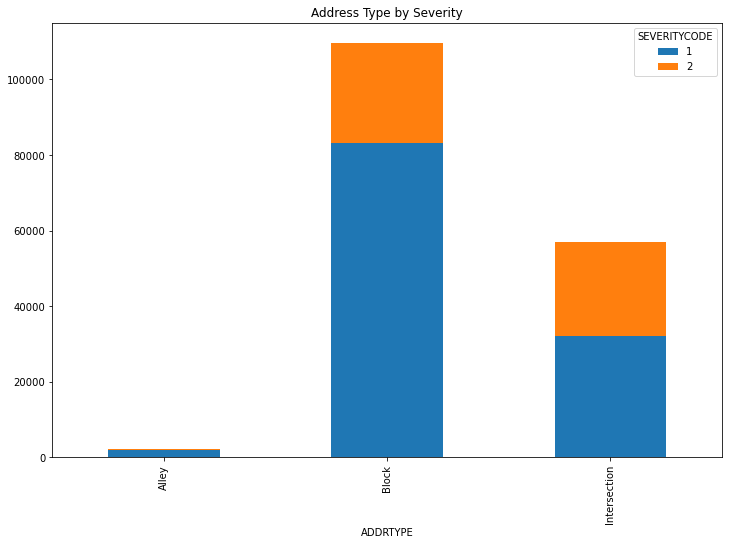

In [21]:
#as earlier, replace the null 
df["ADDRTYPE"].replace(np.nan,'Unknown', inplace=True)
df_notnull=df.loc[df['ADDRTYPE']!='Unknown']
df_notnull = df_notnull[['LOCATION','ADDRTYPE']]                    
df_notnull.drop_duplicates(inplace=True) 
#let's use location to determine missing addresstype 
df_notnull.set_index('LOCATION',inplace=True) 
s=df_notnull.to_dict()['ADDRTYPE']
df.loc[df['ADDRTYPE']=='Unknown','ADDRTYPE']=df[('LOCATION')].map(s)
print("ADDRTYPE",df['ADDRTYPE'].value_counts().to_frame('count'))
print("is null",df['ADDRTYPE'].isna().sum())
df.pivot_table(index= ('ADDRTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True  ,figsize=(12, 8)  )
plt.title("Address Type by Severity");

<h5> volia! not missing address types

JUNCTIONTYPE                                                    count
Mid-Block (not related to intersection)            77983
At Intersection (intersection related)             54891
Mid-Block (but intersection related)               19244
Driveway Junction                                   8939
Unknown                                             5655
At Intersection (but not related to intersection)   1920
Ramp Junction                                        156
Unknown 0


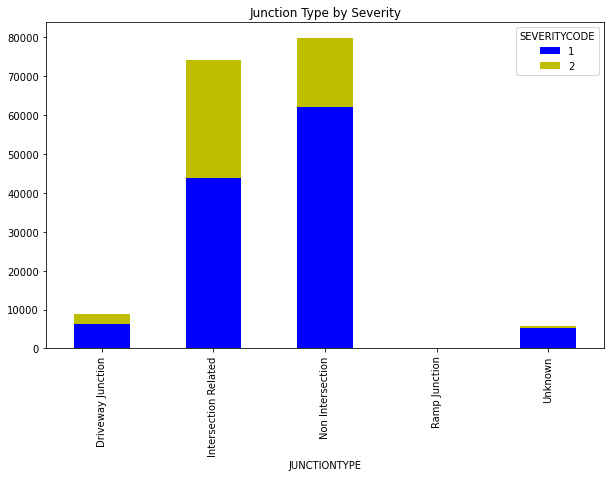

In [22]:
#let's take a look at junction type
df["JUNCTIONTYPE"].replace(np.nan,'Unknown', inplace=True)
print("JUNCTIONTYPE",df['JUNCTIONTYPE'].value_counts().to_frame('count'))
print("Unknown",df['JUNCTIONTYPE'].isna().sum())
#we can classify the below values to intersection related or not
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace({
   'Mid-Block (not related to intersection)':'Non Intersection' ,
   'At Intersection (intersection related)': 'Intersection Related',
   'Mid-Block (but intersection related)': 'Intersection Related',
   'At Intersection (but not related to intersection)':'Non Intersection',
    np.nan:'Unknown'
  })
df.pivot_table(index= ('JUNCTIONTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('b','y') ,figsize=(10, 6)  )
plt.title("Junction Type by Severity");

JUNCTIONTYPE                       count
Non Intersection      81540
Intersection Related  75215
Driveway Junction      9740
Ramp Junction          1998
is null 295


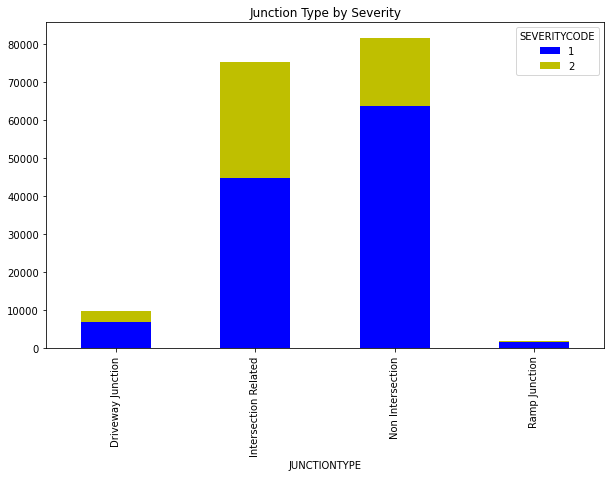

In [23]:
#let's deal with unknowns, how about using location again? 
df_notnull=df.loc[df['JUNCTIONTYPE']!='Unknown']
df_notnull = df_notnull[['LOCATION','JUNCTIONTYPE']]                    
df_notnull.drop_duplicates(inplace=True) 
df_notnull.set_index('LOCATION',inplace=True) 
s=df_notnull.to_dict()['JUNCTIONTYPE']
df.loc[df['JUNCTIONTYPE']=='Unknown','JUNCTIONTYPE']=df[('LOCATION')].map(s)
print("JUNCTIONTYPE",df['JUNCTIONTYPE'].value_counts().to_frame('count'))
print("is null",df['JUNCTIONTYPE'].isna().sum())
df["JUNCTIONTYPE"].replace(np.nan,'Unknown', inplace=True)

#works perfectly only 295 unknowns, lets delete these records
df = df[df["JUNCTIONTYPE"] != 'Unknown']
df.pivot_table(index= ('JUNCTIONTYPE'),columns='SEVERITYCODE', aggfunc='size').plot.bar(stacked=True , color = ('b','y') ,figsize=(10, 6)  )
plt.title("Junction Type by Severity");


In [24]:
#dropping the key set earlier
df.drop(['Key1'],axis=1,inplace=True)

<h4> Feature determination

In [25]:
# is location a factor? let's map serverity codes for 7 months of data in 2016
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)
accident_df=df.loc[(df['X'].notna()) & (df['year'] == 2016 ) &   (df['month'].isin([6,7,8,9,10,11,12]))]
               #& (df['year'].isin([2016,2017,2018,2019]) 
                 #   & (df['X'].notna())   )]
accident_df = accident_df[['X','Y','SEVERITYCODE','year']] 
accident_df['SEVERITYCODE'] = accident_df['SEVERITYCODE'].astype(str) 
print(accident_df.shape)
incidents = folium.map.FeatureGroup()
for lat, lng, label in zip(accident_df.Y, accident_df.X, accident_df.SEVERITYCODE):
    if label == '1':
        folium.features.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='blue'#,
         ).add_to(seattle_map)
    else:
        folium.features.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='red'#,
         ).add_to(seattle_map)

# show map
seattle_map

(6194, 4)


In [26]:
# let's drop the location. from the visualtion it is evident that at a loction both types of accidents may occure. we shall not use X & Y as features
df.drop(['LOCATION'],axis=1,inplace=True)
df=df.loc[(df['X'].notna())]

<AxesSubplot:>

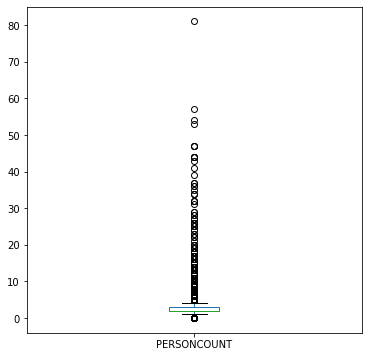

In [27]:
# how about person count, in summary above there are lots of unque values
df['PERSONCOUNT'].plot(kind='box', figsize=(6, 6))

SEVERITYCODE             1      2
PERSONCOUNT-binned               
Low                 113640  50272
Medium                  23      5
High                     1      1

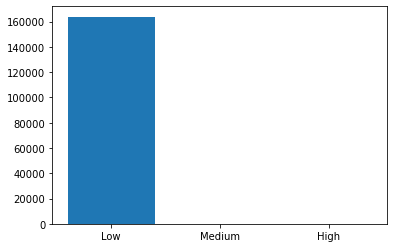

In [28]:
#there are lots of outliers, let's bin it and visualize
bins = np.linspace(min(df["PERSONCOUNT"]), max(df["PERSONCOUNT"]), 4)
group_names = ['Low', 'Medium', 'High']
df['PERSONCOUNT-binned'] = pd.cut(df['PERSONCOUNT'], bins, labels=group_names, include_lowest=True )
pyplot.bar(group_names, df["PERSONCOUNT-binned"].value_counts())
pd.crosstab(df['PERSONCOUNT-binned'],df['SEVERITYCODE'])

In [29]:
#as the binnign showed that most of the data is lowest bin and can't be used to detemrine severity (from the crosstab results)
df.drop(['PERSONCOUNT','PERSONCOUNT-binned'],axis=1,inplace=True)

In [30]:
#let's take a loot a pedcount, many accident's don't invlove pedesterians, but even if 1 pedest is invloved the risk of higher severity increases
pd.crosstab(df['PEDCOUNT'],df['SEVERITYCODE'])

SEVERITYCODE       1      2
PEDCOUNT                   
0             113025  44594
1                623   5463
2                 15    196
3                  1     19
4                  0      4
5                  0      1
6                  0      1

In [31]:
#used for P values & Avonova
from scipy import stats

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


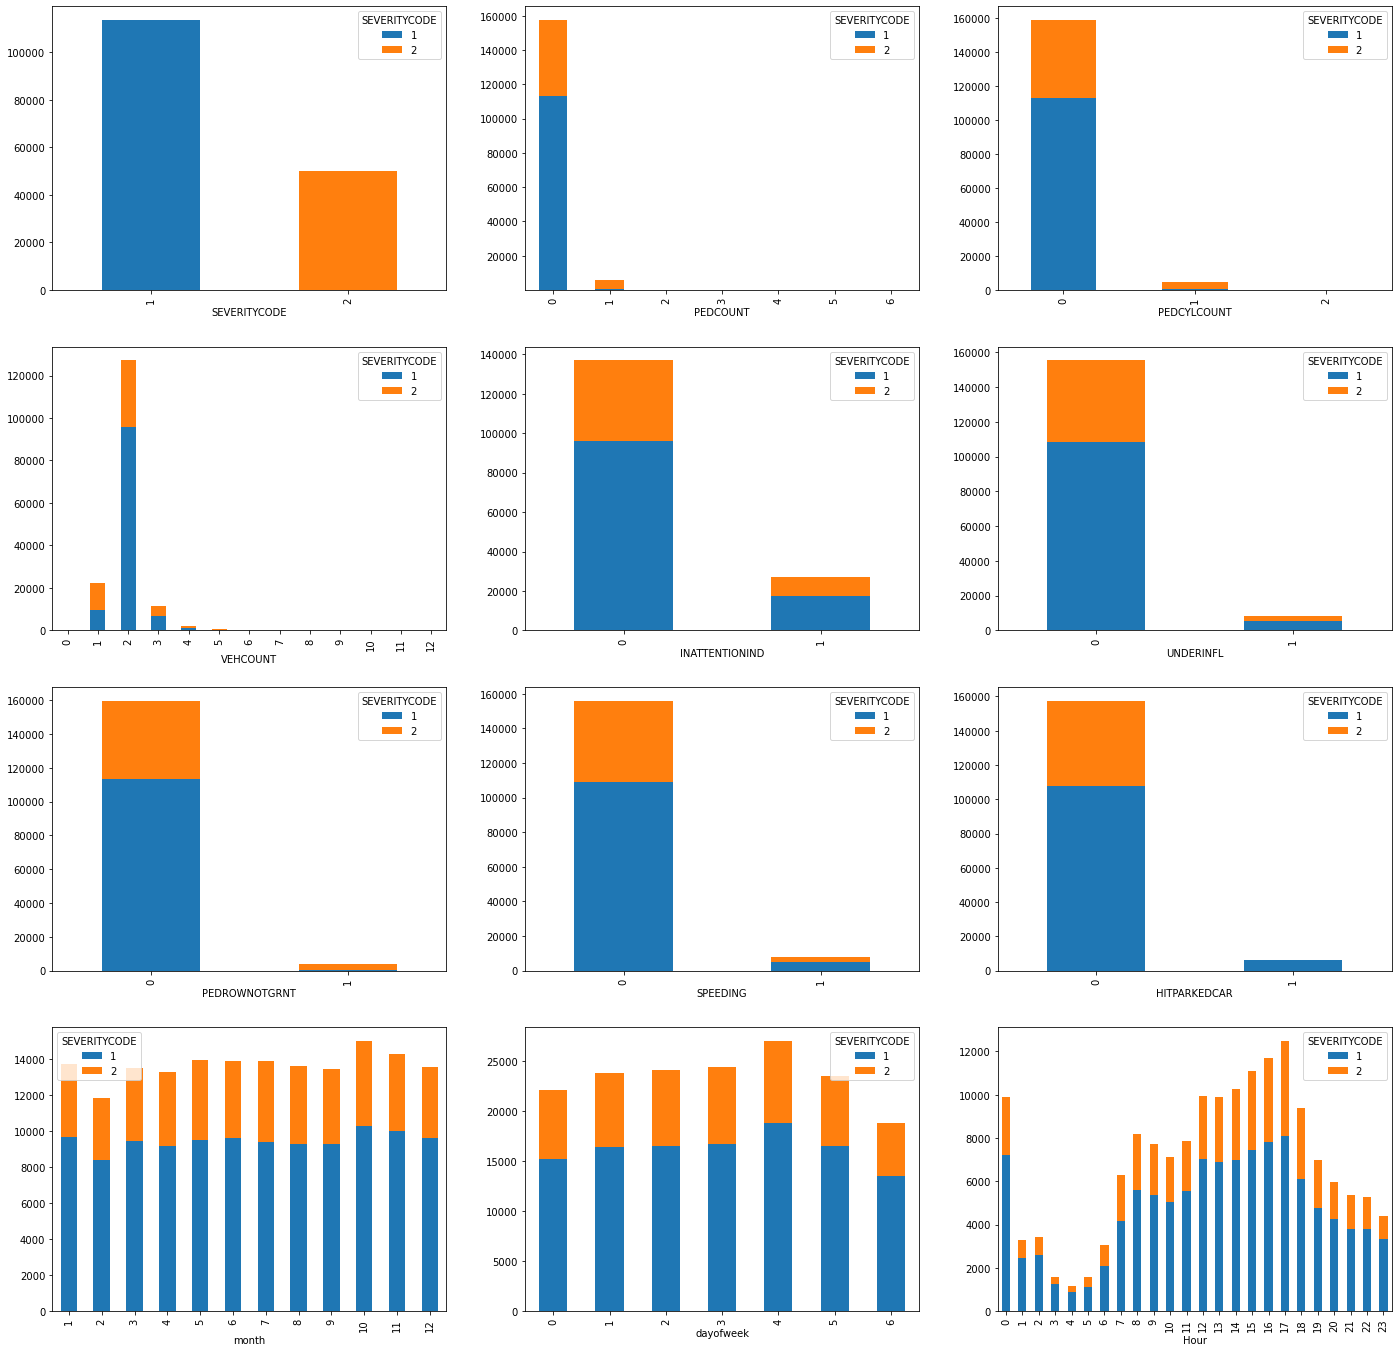

In [32]:
# let's visualize all numerical feature, we will drop year, dat , object id and lat long
numerical_features = df.select_dtypes(include=["number"])
numerical_features.drop(columns=[ 'X', 'Y', 'OBJECTID','year','day'],inplace=True)
plotbyInt_values(numerical_features)

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Total negative linear correlation.

P-value:

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is  <  0.001: we say there is strong evidence that the correlation is significant.

the p-value is  <  0.05: there is moderate evidence that the correlation is significant.

the p-value is  <  0.1: there is weak evidence that the correlation is significant.

the p-value is  >  0.1: there is no evidence that the correlation is significant.

In [33]:
#let's calulate P values for the numerical features
col_name = numerical_features.columns
#['VEHCOUNT', 'INATTENTIONIND','UNDERINFL','SPEEDING', 'HITPARKEDCAR', 'month','dayofweek','PERSONCOUNT']
percof_smry = pd.DataFrame({'Column Name': [], 'Pearson Correlation Coefficient': [], 'P-value of': []})
for i in range (0,len(col_name)):
    pearson_coef, p_value = stats.pearsonr(df[col_name[i]], df['SEVERITYCODE'])
    percof_smry = percof_smry.append({"Column Name":col_name[i],"Pearson Correlation Coefficient": pearson_coef , "P-value of": p_value }, ignore_index=True)
print(percof_smry)

       Column Name  Pearson Correlation Coefficient     P-value of
0     SEVERITYCODE                         1.000000   0.000000e+00
1         PEDCOUNT                         0.251263   0.000000e+00
2      PEDCYLCOUNT                         0.217310   0.000000e+00
3         VEHCOUNT                        -0.088294  5.464418e-281
4   INATTENTIONIND                         0.040824   2.016460e-61
5        UNDERINFL                         0.043036   4.618621e-68
6    PEDROWNOTGRNT                         0.208156   0.000000e+00
7         SPEEDING                         0.038203   5.226122e-54
8     HITPARKEDCAR                        -0.106021   0.000000e+00
9            month                         0.004751   5.437663e-02
10       dayofweek                        -0.017850   4.910711e-13
11            Hour                         0.024883   7.009487e-24


<h5> categorical features

Index(['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND',
       'LIGHTCOND'],
      dtype='object')


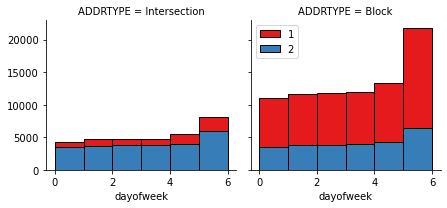

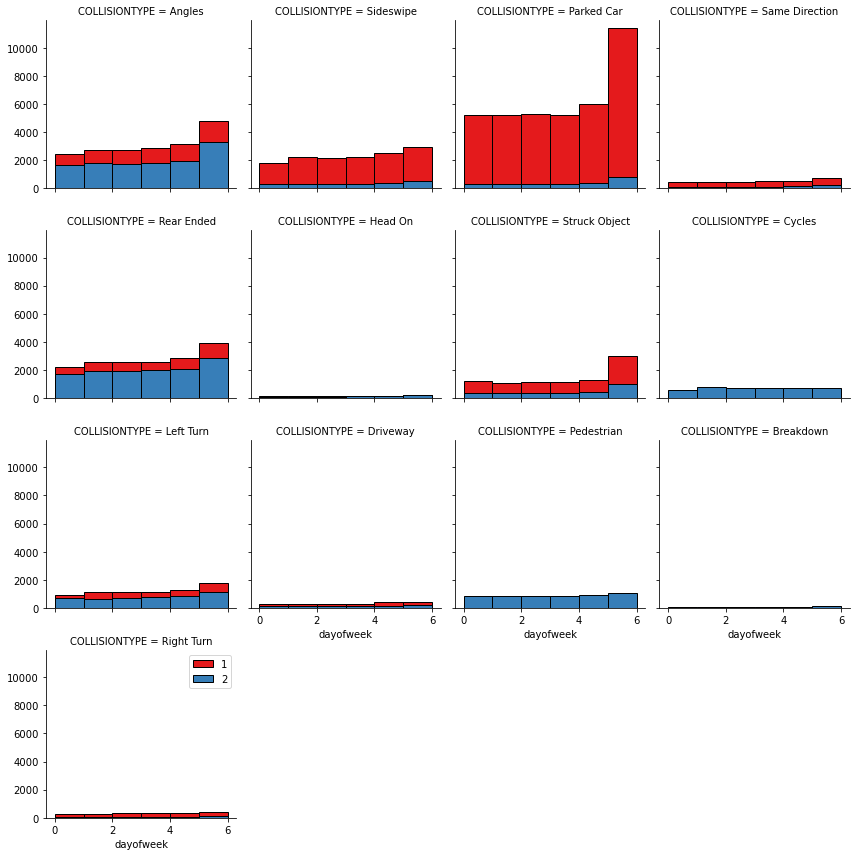

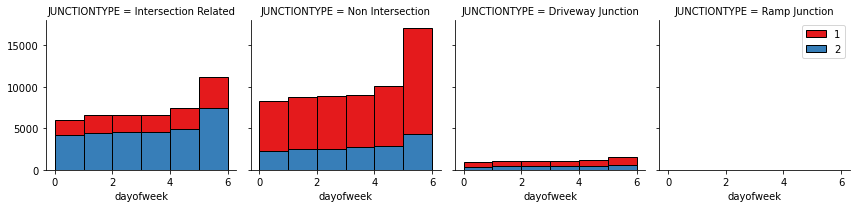

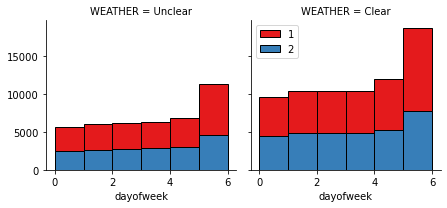

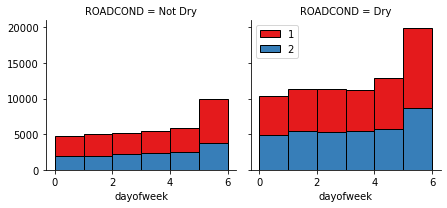

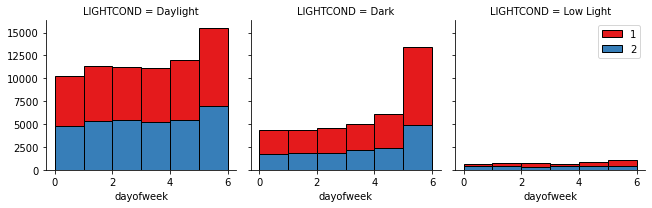

In [34]:
#let's select all object type data and visualize them across the week
categorical_features = df.select_dtypes(exclude = [np.number, np.datetime64])#.columns.tolist()
char_value=(categorical_features.columns)
print(char_value)
plotbycharvalues(char_value)


['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND',
       'LIGHTCOND'],

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>
<p>large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. expect ANOVA to return a sizeable F-test score and a small p-value.</p>
<p>let's calculate avonva score for all categorical features.</p>

In [35]:

ANOVA_smry = pd.DataFrame({'Column Name': [], 'F Value': [], 'P value': []})
grouped_test=df[['LIGHTCOND', 'SEVERITYCODE']].groupby(['LIGHTCOND'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Daylight')['SEVERITYCODE']
                             ,grouped_test.get_group('Dark')['SEVERITYCODE']
                             ,grouped_test.get_group('Low Light')['SEVERITYCODE']
                            # ,grouped_test.get_group('Unknown')['SEVERITYCODE'] 
                             )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"LIGHTCOND","F Value": f_val , "P value": p_val }, ignore_index=True)


In [36]:
grouped_test=df[['ADDRTYPE', 'SEVERITYCODE']].groupby(['ADDRTYPE'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Intersection')['SEVERITYCODE']
                             ,grouped_test.get_group('Block')['SEVERITYCODE']
                                          )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"ADDRTYPE","F Value": f_val , "P value": p_val }, ignore_index=True)


In [37]:
grouped_test=df[['COLLISIONTYPE', 'SEVERITYCODE']].groupby(['COLLISIONTYPE'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Angles')['SEVERITYCODE']
                              ,grouped_test.get_group('Sideswipe')['SEVERITYCODE']
                              ,grouped_test.get_group('Parked Car')['SEVERITYCODE']
                              ,grouped_test.get_group('Rear Ended')['SEVERITYCODE']
                              ,grouped_test.get_group('Head On')['SEVERITYCODE']
                              ,grouped_test.get_group('Left Turn')['SEVERITYCODE']
                              ,grouped_test.get_group('Right Turn')['SEVERITYCODE']
                              ,grouped_test.get_group('Cycles')['SEVERITYCODE']
                              ,grouped_test.get_group('Driveway')['SEVERITYCODE']
                              ,grouped_test.get_group('Pedestrian')['SEVERITYCODE']   
                              ,grouped_test.get_group('Breakdown')['SEVERITYCODE']
                              ,grouped_test.get_group('Same Direction')['SEVERITYCODE'] 
                              ,grouped_test.get_group('Struck Object')['SEVERITYCODE']
                             )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"COLLISIONTYPE","F Value": f_val , "P value": p_val }, ignore_index=True)

In [38]:
grouped_test=df[['JUNCTIONTYPE', 'SEVERITYCODE']].groupby(['JUNCTIONTYPE'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Non Intersection')['SEVERITYCODE']
                             ,grouped_test.get_group('Intersection Related')['SEVERITYCODE']
                             ,grouped_test.get_group('Ramp Junction')['SEVERITYCODE']
                             ,grouped_test.get_group('Driveway Junction')['SEVERITYCODE']
                                         )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"JUNCTIONTYPE","F Value": f_val , "P value": p_val }, ignore_index=True)

In [39]:
grouped_test=df[['WEATHER', 'SEVERITYCODE']].groupby(['WEATHER'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Clear')['SEVERITYCODE']
                             ,grouped_test.get_group('Unclear')['SEVERITYCODE']
                            )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"WEATHER","F Value": f_val , "P value": p_val }, ignore_index=True)

In [40]:
grouped_test=df[['ROADCOND', 'SEVERITYCODE']].groupby(['ROADCOND'])
f_val, p_val = stats.f_oneway(grouped_test.get_group('Dry')['SEVERITYCODE']
                             ,grouped_test.get_group('Not Dry')['SEVERITYCODE']
                             #,grouped_test.get_group('Unknown')['SEVERITYCODE']
                        
                             )  
ANOVA_smry = ANOVA_smry.append({"Column Name":"ROADCOND","F Value": f_val , "P value": p_val }, ignore_index=True)

In [41]:
ANOVA_smry

Column Name      F Value       P value
0      LIGHTCOND   113.296989  6.756411e-50
1       ADDRTYPE  6929.297391  0.000000e+00
2  COLLISIONTYPE  3892.866144  0.000000e+00
3   JUNCTIONTYPE  2216.275852  0.000000e+00
4        WEATHER    14.132951  1.703928e-04
5       ROADCOND   119.806061  7.132669e-28

In [42]:
#based on p values using pearce coefficient and avanova let's drop the below colums

df.drop(columns=[ 'OBJECTID','year','day','WEATHER','PEDCOUNT','PEDCYLCOUNT','PEDROWNOTGRNT','HITPARKEDCAR','month','INCDATE', 'INCDTTM','LIGHTCOND','ROADCOND'],axis=1,inplace=True)

In [43]:
df.drop(columns=[ 'X', 'Y'],axis=1,inplace=True)
df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'dayofweek', 'Hour'],
      dtype='object')

In [93]:
#feature selection and co relation
Feature=df[['SEVERITYCODE','ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE','INATTENTIONIND', 'UNDERINFL', 'SPEEDING','dayofweek', 'Hour']]

In [94]:
from sklearn import preprocessing
# use encoding to convert cateorical values.
le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Non Intersection','Intersection Related','Driveway Junction','Ramp Junction'])
Feature["JUNCTIONTYPE"] = le_lc.transform(Feature["JUNCTIONTYPE"]) 

le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Block','Intersection'])
Feature["ADDRTYPE"] = le_lc.transform(Feature["ADDRTYPE"]) 
le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Angles', 'Sideswipe', 'Parked Car', 'Same Direction',
       'Rear Ended', 'Head On', 'Struck Object', 'Cycles', 'Left Turn',
       'Driveway', 'Pedestrian', 'Breakdown', 'Right Turn'])
Feature["COLLISIONTYPE"] = le_lc.transform(Feature["COLLISIONTYPE"]) 

In [95]:
print(Feature.columns)

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'dayofweek', 'Hour'],
      dtype='object')


In [96]:
Feature.corr()

SEVERITYCODE  ADDRTYPE  COLLISIONTYPE  VEHCOUNT  JUNCTIONTYPE  \
SEVERITYCODE        1.000000  0.201378      -0.144644 -0.088294     -0.151800   
ADDRTYPE            0.201378  1.000000      -0.450280 -0.098554     -0.472011   
COLLISIONTYPE      -0.144644 -0.450280       1.000000 -0.126049      0.362889   
VEHCOUNT           -0.088294 -0.098554      -0.126049  1.000000      0.068466   
JUNCTIONTYPE       -0.151800 -0.472011       0.362889  0.068466      1.000000   
INATTENTIONIND      0.040824 -0.078845       0.081148  0.046350      0.035770   
UNDERINFL           0.043036 -0.046195       0.077171 -0.007506      0.055864   
SPEEDING            0.038203 -0.057170       0.105463 -0.043290      0.044674   
dayofweek          -0.017850 -0.012360       0.004209  0.006383      0.025505   
Hour                0.024883  0.032019      -0.047342  0.022475     -0.030968   

                INATTENTIONIND  UNDERINFL  SPEEDING  dayofweek      Hour  
SEVERITYCODE          0.040824   0.043036  0.038203  -0.017850  0.024883  
ADDRTYPE             -0.078845  -0.046195 -0.057170  -0.012360  0.032019  
COLLISIONTYPE         0.081148   0.077171  0.105463   0.004209 -0.047342  
VEHCOUNT              0.046350  -0.007506 -0.043290   0.006383  0.022475  
JUNCTIONTYPE          0.035770   0.055864  0.044674   0.025505 -0.030968  
INATTENTIONIND        1.000000  -0.033525 -0.051442  -0.018997  0.005172  
UNDERINFL            -0.033525   1.000000  0.093310   0.077957 -0.072547  
SPEEDING             -0.051442   0.093310  1.000000   0.029907 -0.051785  
dayofweek            -0.018997   0.077957  0.029907   1.000000 -0.044548  
Hour                  0.005172  -0.072547 -0.051785  -0.044548  1.000000

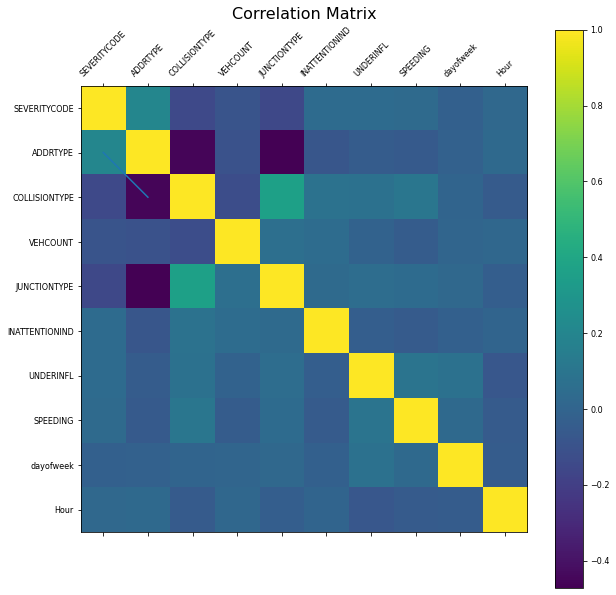

In [97]:
#let's visualize the correaltions
f = plt.figure(figsize=(10, 10))
plt.matshow(Feature.corr(), fignum=f.number)
plt.xticks(range(Feature.shape[1]), Feature.columns, fontsize=8, rotation=45)
plt.yticks(range(Feature.shape[1]), Feature.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=16);
plt.plot([1,2])
f.savefig('test.png', bbox_inches='tight')

In [49]:
Feature.drop(columns=[ 'SEVERITYCODE'],axis=1,inplace=True)
X = Feature.values
X[0:5]

array([[ 1,  0,  2,  1,  0,  0,  0,  2, 14],
       [ 0, 11,  2,  2,  0,  0,  0,  2, 18],
       [ 0,  6,  3,  2,  0,  0,  0,  3, 10],
       [ 0, 10,  3,  2,  0,  0,  0,  4,  9],
       [ 1,  0,  2,  1,  0,  0,  0,  2,  8]])

In [50]:
# let' set out independent variable 
Y = df['SEVERITYCODE'].values
print(Y[0:5])
type(Y)

[2 1 1 1 2]


numpy.ndarray

In [51]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.37609549, -1.61543555,  0.05066432, -0.70835155, -0.44305634,
        -0.23442322, -0.22508012, -0.49508378,  0.20461975],
       [-0.72669375,  1.32653435,  0.05066432,  0.94795427, -0.44305634,
        -0.23442322, -0.22508012, -0.49508378,  0.86249285],
       [-0.72669375, -0.0107247 ,  1.82925322,  0.94795427, -0.44305634,
        -0.23442322, -0.22508012,  0.02378129, -0.45325334],
       [-0.72669375,  1.05908254,  1.82925322,  0.94795427, -0.44305634,
        -0.23442322, -0.22508012,  0.54264636, -0.61772162],
       [ 1.37609549, -1.61543555,  0.05066432, -0.70835155, -0.44305634,
        -0.23442322, -0.22508012, -0.49508378, -0.78218989]])

<h4> Model selection

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (122956, 9) (122956,)
Test set: (40986, 9) (40986,)


<h4> K NN

In [53]:
#find the best K
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    KSEVERITY = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=KSEVERITY.predict(X_test)
   
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

print("mean accuracy is for differnt k is ", mean_acc)

mean accuracy is for differnt k is  [0.68135461 0.71883082 0.70738789 0.73063973 0.71873323 0.73427512
 0.72312497 0.73493388 0.72878544 0.7380569  0.73200605 0.73895964
 0.73303079 0.74113112]


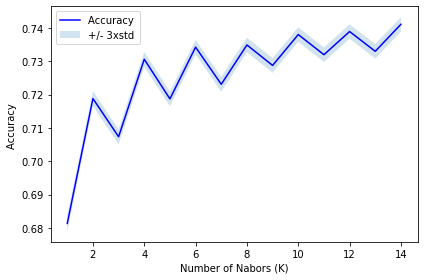

In [54]:
#plot accuracy to find the best K
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.20)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [55]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7411311179427121 with k= 14


In [56]:
#implement the model with best value of K which is 14
k = 14
#Train Model and Predict  
KSEVERITY = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
print(KSEVERITY)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='uniform')


<h4>LR

In [82]:
# will create the logistic regression first
from sklearn.linear_model import LogisticRegression

SEVERITYLR = LogisticRegression(C=0.01, solver="newton-cg").fit(X_train,Y_train)
yhat = SEVERITYLR.predict(X_test)
print(yhat [0:5])
yhat_prob = SEVERITYLR.predict_proba(X_test)
print(yhat_prob [0:5])


[1 1 1 1 1]
[[0.78 0.22]
 [0.66 0.34]
 [0.69 0.31]
 [0.8  0.2 ]
 [0.63 0.37]]


<h4>Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

SEVERITYTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
SEVERITYTree.fit(X_train,Y_train)
predTree = SEVERITYTree.predict(X_test)
print (predTree)

[1 1 2 ... 2 1 1]


In [59]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

DecisionTrees's Accuracy:  0.7546479285609721


In [60]:
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus
import matplotlib.image as mpimg
from sklearn.externals.six import StringIO
from sklearn import tree

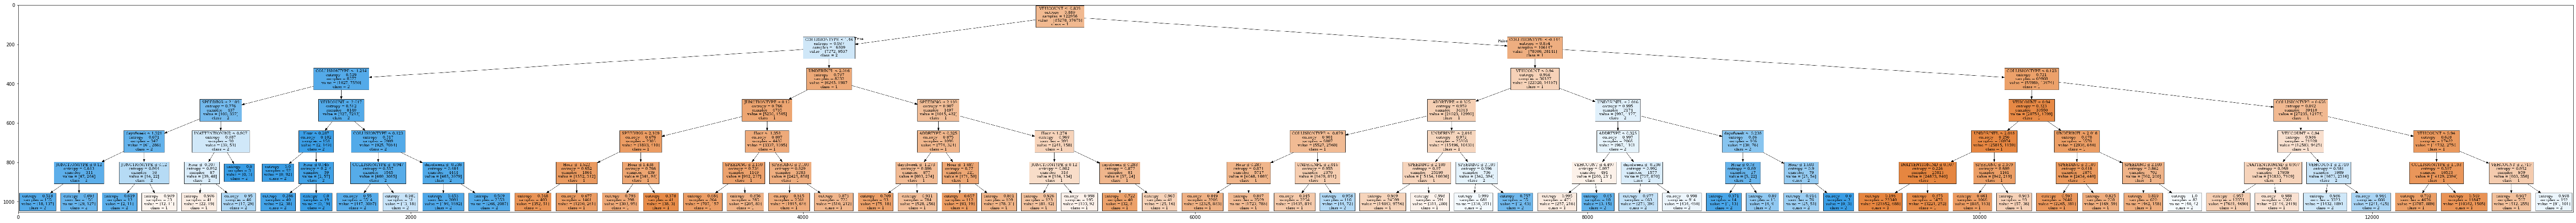

In [61]:
dot_data = StringIO()
filename = "Sevrtree.png"
featureNames = Feature.columns
targetNames = Y
out=tree.export_graphviz(SEVERITYTree,feature_names=featureNames, out_file=dot_data,  class_names= np.unique(Y_train).astype(str)
                         ,filled=True
                         ,special_characters=True
                         ,rotate=False
                        )  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100,120))
plt.imshow(img,interpolation='nearest') 

<h4> SVM

In [62]:
from sklearn import svm

In [63]:
SEVERITYSVM = svm.SVC(kernel='sigmoid')
SEVERITYSVM.fit(X_train, Y_train) 
yhat = SEVERITYSVM.predict(X_test)
yhat [0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 1])

<h3>Model Evaluation

In [64]:
#fetch random records from cleaned dataset.
df_Test=df.sample(frac=0.25)

In [65]:
#apply encoding

le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Non Intersection','Intersection Related','Driveway Junction','Ramp Junction'])
df_Test["JUNCTIONTYPE"] = le_lc.transform(df_Test["JUNCTIONTYPE"]) 

le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Block','Intersection'])
df_Test["ADDRTYPE"] = le_lc.transform(df_Test["ADDRTYPE"]) 

le_lc = preprocessing.LabelEncoder()
le_lc.fit(['Angles', 'Sideswipe', 'Parked Car', 'Same Direction',
       'Rear Ended', 'Head On', 'Struck Object', 'Cycles', 'Left Turn',
       'Driveway', 'Pedestrian', 'Breakdown', 'Right Turn'])
df_Test["COLLISIONTYPE"] = le_lc.transform(df_Test["COLLISIONTYPE"]) 

In [66]:
X_Eval=df_Test[['ADDRTYPE', 'COLLISIONTYPE', 'VEHCOUNT', 'JUNCTIONTYPE','INATTENTIONIND','UNDERINFL', 'SPEEDING','dayofweek', 'Hour']].values

In [67]:
X_Eval = preprocessing.StandardScaler().fit(X_Eval).transform(X_Eval)
print(X_Eval[0:5])

[[-0.72148058 -0.01449407  0.05536943 -0.70885591 -0.44371298 -0.23320295
  -0.22880821  0.02133286  0.70177798]
 [ 1.3860387  -1.61571764  0.05536943 -0.70885591 -0.44371298 -0.23320295
  -0.22880821  1.57619125  0.20980438]
 [-0.72148058 -0.01449407  0.05536943  0.94565254 -0.44371298 -0.23320295
  -0.22880821  1.57619125 -2.0860724 ]
 [-0.72148058  1.5867295  -1.72872754  0.94565254 -0.44371298  4.28811034
  -0.22880821 -1.53352552 -1.43010761]
 [-0.72148058  1.31985891  0.05536943  0.94565254  2.25370916 -0.23320295
  -0.22880821 -1.01523939 -0.44616041]]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [68]:
Y_Eval = df_Test['SEVERITYCODE'].values
print(Y_Eval[0:5])


[1 2 1 2 1]


In [69]:
from sklearn import preprocessing
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

<h5> let's calculate Jaccard index, f1 score and logloss for all models

In [70]:
KSEVERITY_yhat = KSEVERITY.predict(X_Eval)
KSEVERITY_yhat_prob = KSEVERITY.predict_proba(X_Eval)

print("KNN Jaccard index: %.3f" % jaccard_similarity_score(Y_Eval, KSEVERITY_yhat))
print("KNN F1-score: %.3f" % f1_score(Y_Eval, KSEVERITY_yhat, average='weighted') )
print("KNN LogLoss: %.3f" % log_loss(Y_Eval, KSEVERITY_yhat_prob))

KNN Jaccard index: 0.752
KNN F1-score: 0.724
KNN LogLoss: 0.649


In [71]:
SEVERITYTree_yhat = SEVERITYTree.predict(X_Eval)
SEVERITYTree_yhat_prob = SEVERITYTree.predict_proba(X_Eval)
print("DT Jaccard index: %.3f" % jaccard_similarity_score(Y_Eval, SEVERITYTree_yhat))
print("DT F1-score: %.3f" % f1_score(Y_Eval, SEVERITYTree_yhat, average='weighted') )
print("DT LogLoss: %.3f" % log_loss(Y_Eval, SEVERITYTree_yhat_prob))

DT Jaccard index: 0.753
DT F1-score: 0.715
DT LogLoss: 0.487


In [72]:
SEVERITYLR_yhat = SEVERITYLR.predict(X_Eval)
SEVERITYLR_yhat_prob = SEVERITYLR.predict_proba(X_Eval)
print("LR Jaccard index: %.3f" % jaccard_similarity_score(Y_Eval, SEVERITYLR_yhat))
print("LR F1-score: %.3f" % f1_score(Y_Eval, SEVERITYLR_yhat, average='weighted') )
print("LR LogLoss: %.3f" % log_loss(Y_Eval, SEVERITYLR_yhat_prob))

LR Jaccard index: 0.705
LR F1-score: 0.625
LR LogLoss: 0.584


In [73]:
SEVERITYSVM_yhat = SEVERITYSVM.predict(X_Eval)
print("SVM Jaccard index: %.3f" % jaccard_similarity_score(Y_Eval, SEVERITYSVM_yhat))
print("SVM F1-score: %.3f" % f1_score(Y_Eval, SEVERITYSVM_yhat, average='weighted') )


SVM Jaccard index: 0.603
SVM F1-score: 0.603


<h5>Let's visualize the models using confusion matrix and classification report

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           1       0.76      0.93      0.84     28423
           2       0.69      0.35      0.47     12563

   micro avg       0.75      0.75      0.75     40986
   macro avg       0.72      0.64      0.65     40986
weighted avg       0.74      0.75      0.72     40986

Normalized confusion matrix
[[0.93 0.07]
 [0.65 0.35]]


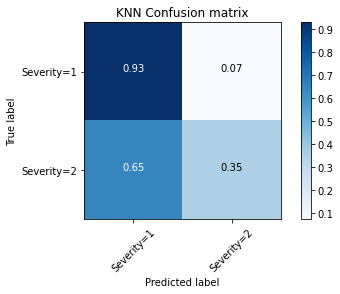

In [89]:

#print(confusion_matrix(Y_Test, SVRTYLR_yhat, labels=[1,0]))
print (classification_report(Y_Eval, KSEVERITY_yhat))

# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_Eval, KSEVERITY_yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= True,  title='KNN Confusion matrix')

              precision    recall  f1-score   support

           1       0.75      0.95      0.84     28423
           2       0.74      0.30      0.43     12563

   micro avg       0.75      0.75      0.75     40986
   macro avg       0.75      0.63      0.63     40986
weighted avg       0.75      0.75      0.71     40986

Normalized confusion matrix
[[0.95 0.05]
 [0.7  0.3 ]]


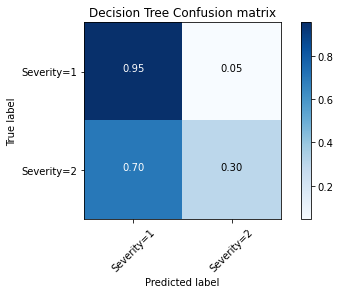

In [90]:

#print(confusion_matrix(Y_Test, SVRTYLR_yhat, labels=[1,0]))
print (classification_report(Y_Eval, SEVERITYTree_yhat))

# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_Eval, SEVERITYTree_yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= True,  title='Decision Tree Confusion matrix')

              precision    recall  f1-score   support

           1       0.71      0.97      0.82     28423
           2       0.61      0.11      0.18     12563

   micro avg       0.71      0.71      0.71     40986
   macro avg       0.66      0.54      0.50     40986
weighted avg       0.68      0.71      0.62     40986

Normalized confusion matrix
[[0.97 0.03]
 [0.89 0.11]]


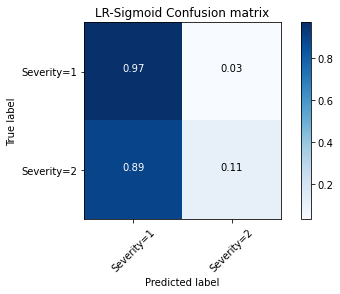

In [91]:

#print(confusion_matrix(Y_Test, SVRTYLR_yhat, labels=[1,0]))
print (classification_report(Y_Eval, SEVERITYLR_yhat))

# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_Eval, SEVERITYLR_yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= True,  title='LR-Sigmoid Confusion matrix')

              precision    recall  f1-score   support

           1       0.71      0.71      0.71     28423
           2       0.35      0.35      0.35     12563

   micro avg       0.60      0.60      0.60     40986
   macro avg       0.53      0.53      0.53     40986
weighted avg       0.60      0.60      0.60     40986

Normalized confusion matrix
[[0.71 0.29]
 [0.65 0.35]]


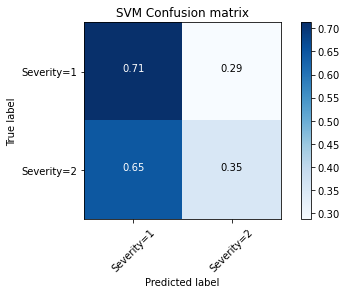

In [92]:

#print(confusion_matrix(Y_Test, SVRTYLR_yhat, labels=[1,0]))
print (classification_report(Y_Eval, SEVERITYSVM_yhat))

# Compute confusion matrix

cnf_matrix = confusion_matrix(Y_Eval, SEVERITYSVM_yhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity=1','Severity=2'],normalize= True
                    ,  title='SVM Confusion matrix')

<h4> from the performance and confusion matrix seems KNN is best fit here